In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn.decomposition import PCA
from keras.utils import np_utils

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x = pd.read_csv("MNIST.csv")
X_ = np.array(x)

X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print X.shape,y.shape

(42000, 784) (42000,)


In [3]:
pca = PCA(n_components=64)

X_train = pca.fit_transform(X)
Y_train = np_utils.to_categorical(y)

print X_train.shape,Y_train.shape

(42000, 64) (42000, 10)


In [4]:
model = Sequential()
model.add(Dense(16, input_shape=(64,)))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 1,210
Trainable params: 1,210
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
hist = model.fit(X_train,Y_train,
                 epochs = 20,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 54us/step - loss: 1.9576 - acc: 0.3378 - val_loss: 1.4308 - val_acc: 0.6286
Epoch 2/20
33600/33600 [==============================] - 1s 28us/step - loss: 1.1048 - acc: 0.7271 - val_loss: 0.8229 - val_acc: 0.7930
Epoch 3/20
33600/33600 [==============================] - 1s 30us/step - loss: 0.6789 - acc: 0.8274 - val_loss: 0.5573 - val_acc: 0.8524
Epoch 4/20
33600/33600 [==============================] - 1s 37us/step - loss: 0.4965 - acc: 0.8673 - val_loss: 0.4374 - val_acc: 0.8825
Epoch 5/20
33600/33600 [==============================] - 2s 45us/step - loss: 0.4080 - acc: 0.8870 - val_loss: 0.3740 - val_acc: 0.8962
Epoch 6/20
33600/33600 [==============================] - 1s 35us/step - loss: 0.3577 - acc: 0.8997 - val_loss: 0.3367 - val_acc: 0.9038
Epoch 7/20
33600/33600 [==============================] - 1s 29us/step - loss: 0.3256 - acc: 0.9075 - val_loss: 0.3121 - val_acc:

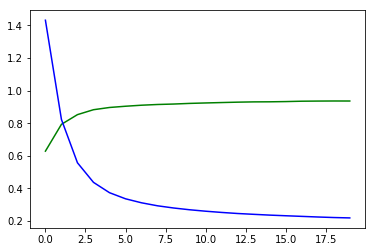

In [7]:
plt.figure(0)
plt.plot(hist.history['val_acc'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()